In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Data reading**

In [3]:
df=pd.read_csv("/kaggle/input/diabetees/diabetes.csv")

**Info show**

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


**View Details**

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.840052,120.897269,69.115735,20.509753,79.697009,31.998179,0.471590,33.269181,0.349805
std,3.370237,31.951886,19.345296,15.959020,115.203999,7.880557,0.331208,11.778737,0.477219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Check nulls**

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Check Dublicated**

In [8]:
df.duplicated().sum()

0

In [16]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Check for unrealistic values**

In [9]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zeros:
    print(f"{col} has {len(df[df[col]==0])} zeros")


Glucose has 5 zeros
BloodPressure has 35 zeros
SkinThickness has 228 zeros
Insulin has 374 zeros
BMI has 11 zeros


In [11]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_zeros:
    median = df[df[col] != 0][col].median()
    df[col] = df[col].replace(0, median)


In [14]:
for col in columns_with_zeros:
    print(f"{col} has {len(df[df[col]==0])} zeros after cleaning")

Glucose has 0 zeros after cleaning
BloodPressure has 0 zeros after cleaning
SkinThickness has 0 zeros after cleaning
Insulin has 0 zeros after cleaning
BMI has 0 zeros after cleaning


**EDA and Visualization**

1. **Distribution of Diabetes Outcome**

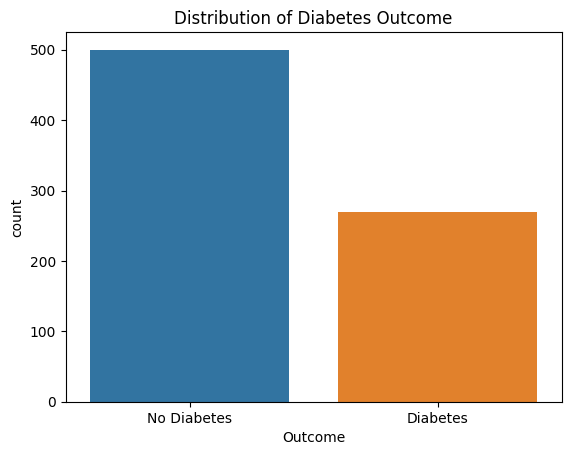

In [19]:
sns.countplot(x='Outcome', data=df)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.title('Distribution of Diabetes Outcome')
plt.show()

2. **Glucose Levels by Outcome**

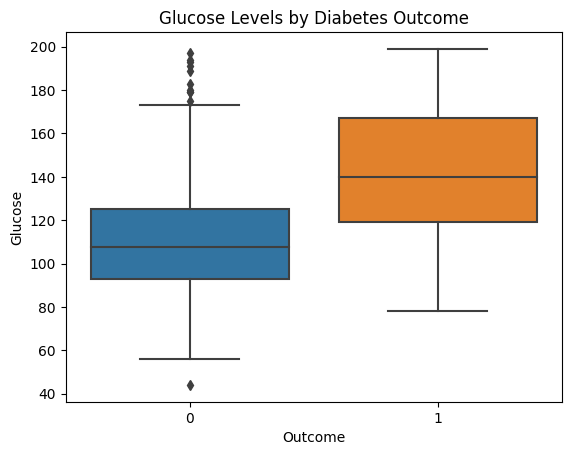

In [24]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels by Diabetes Outcome')
plt.show()


3. **Correlation Heatmap**

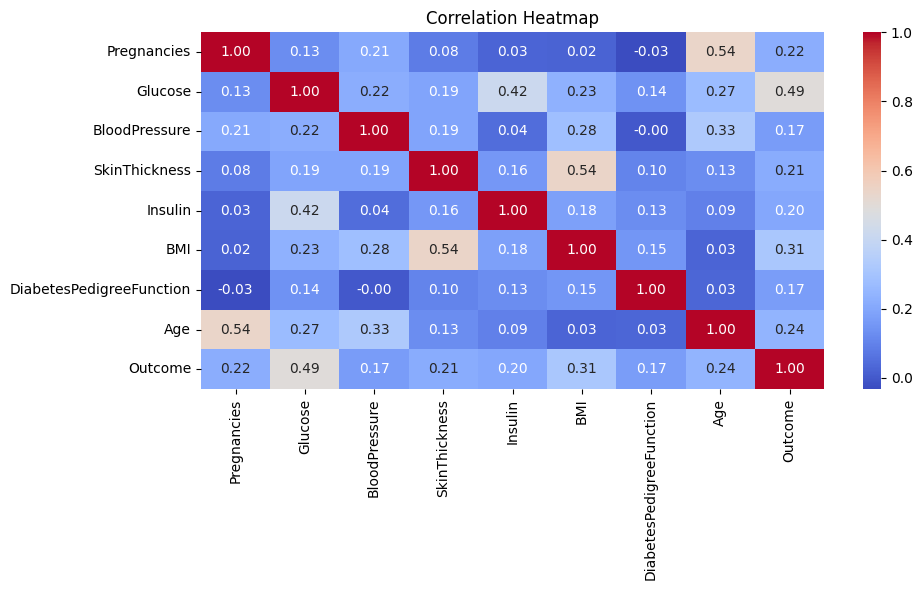

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


4. **BMI Distribution**

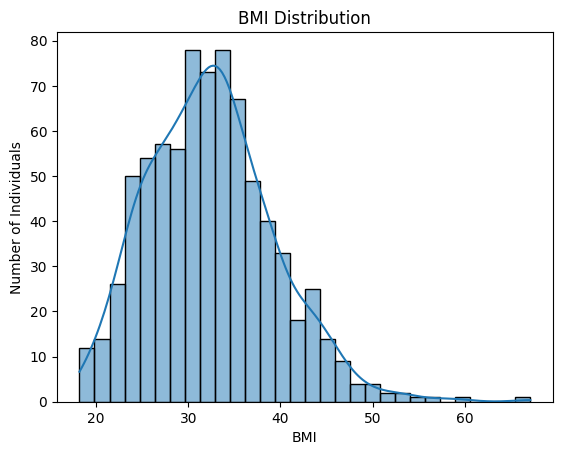

In [26]:
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Number of Individuals')
plt.show()


5. **BMI by Diabetes Outcome**

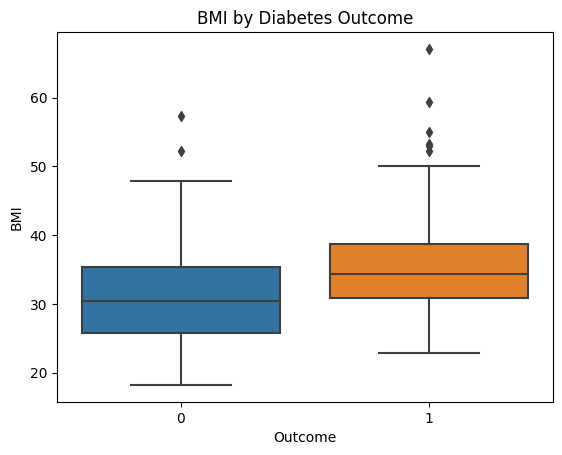

In [27]:
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI by Diabetes Outcome')
plt.show()


6. **Pregnancies Distribution**

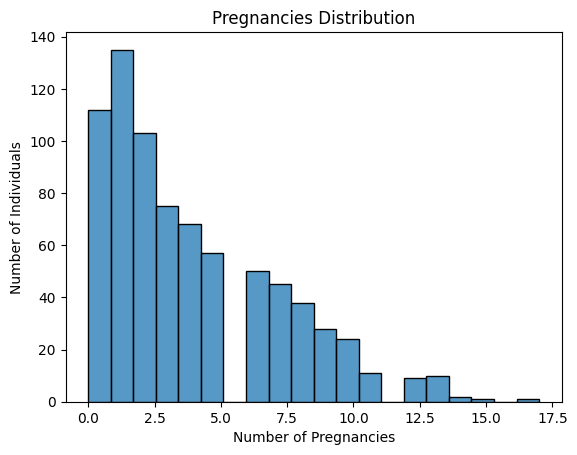

In [28]:
sns.histplot(df['Pregnancies'], bins=20, kde=False)
plt.title('Pregnancies Distribution')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Number of Individuals')
plt.show()


7. **Pregnancies by Diabetes Outcome**

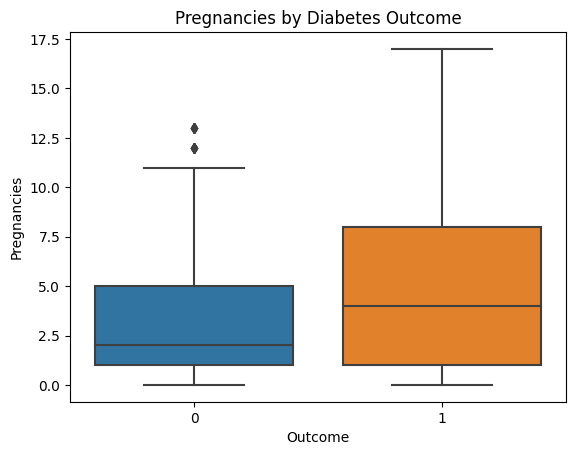

In [29]:
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title('Pregnancies by Diabetes Outcome')
plt.show()


**Check Outliers**

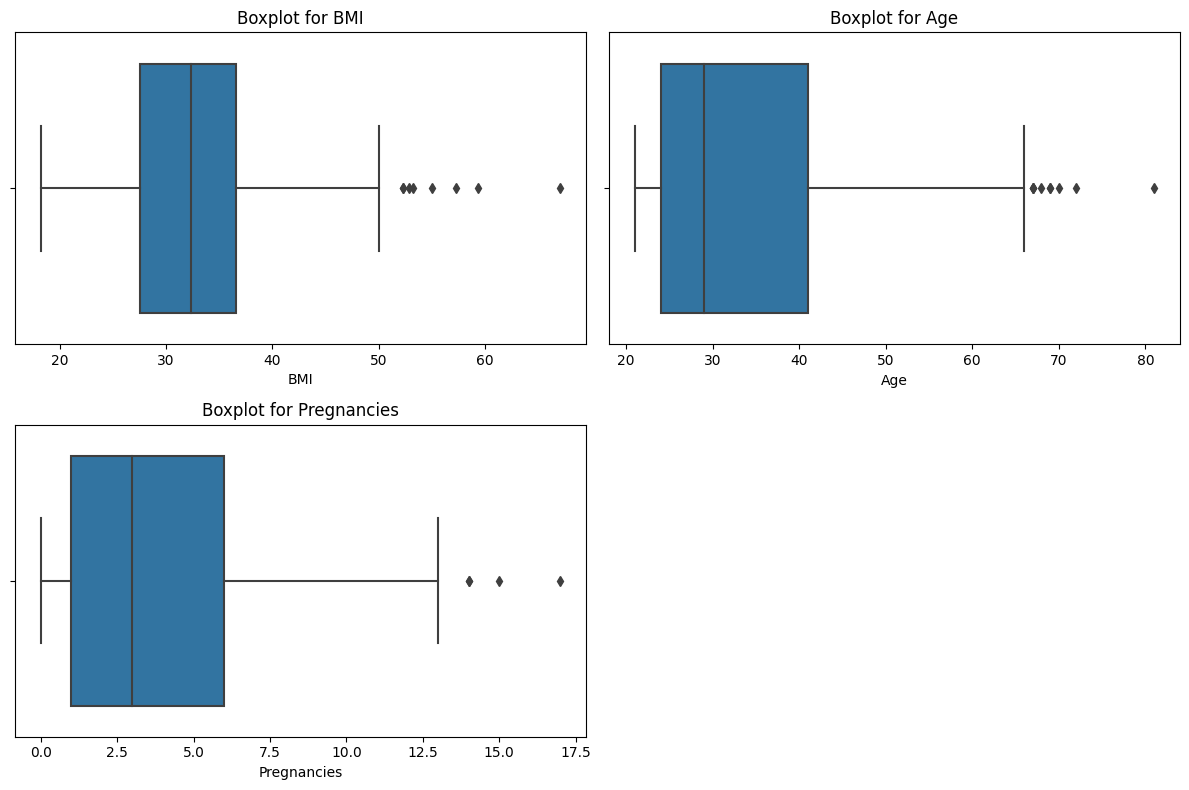

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 صفوف و 2 أعمدة

sns.boxplot(x=df['BMI'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot for BMI')

sns.boxplot(x=df['Age'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot for Age')

fig.delaxes(axes[1,1])  

sns.boxplot(x=df['Pregnancies'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot for Pregnancies')

plt.tight_layout()
plt.show()

8. **Age Distribution by Diabetes Outcome**

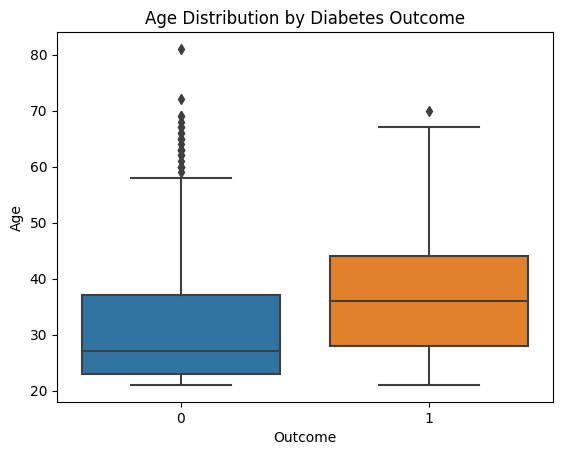

In [32]:
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Age Distribution by Diabetes Outcome')
plt.show()


9. **Blood Pressure by Diabetes Outcome**

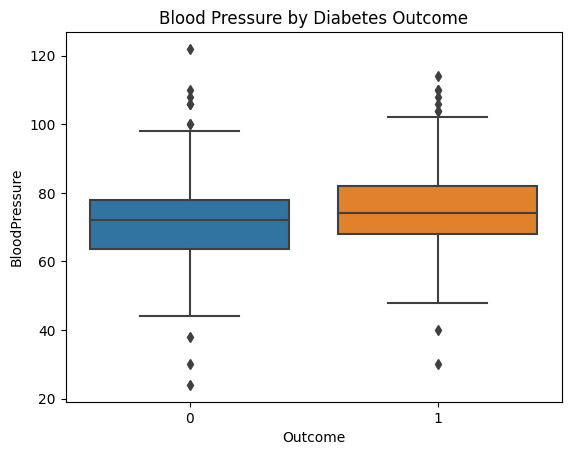

In [33]:
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title('Blood Pressure by Diabetes Outcome')
plt.show()


9. **Count of Pregnancies by Diabetes Outcome**

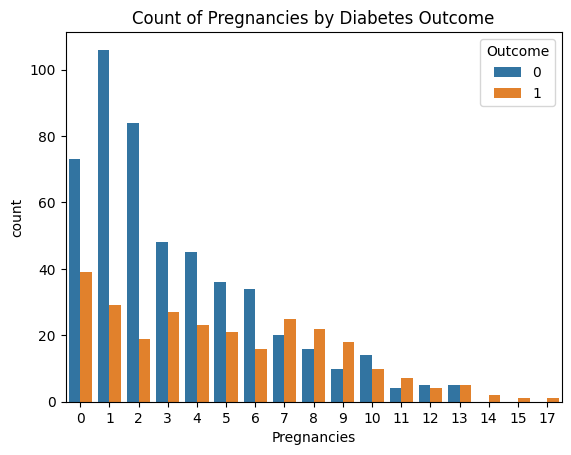

In [34]:
sns.countplot(x='Pregnancies', hue='Outcome', data=df)
plt.title('Count of Pregnancies by Diabetes Outcome')
plt.show()


10. **Glucose vs BMI by Diabetes Outcome**

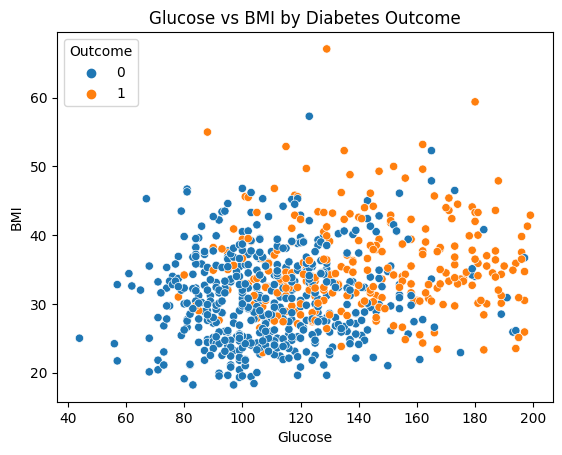

In [35]:
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')
plt.title('Glucose vs BMI by Diabetes Outcome')
plt.show()
